In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("q1.csv")

In [4]:
import seaborn

ModuleNotFoundError: No module named 'seaborn'

In [25]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [26]:
df.shape #(num_records, num_variables)

(27820, 12)

In [27]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [28]:
for col in df.columns:
  print(col, ": ", len(df[col].unique()))

country :  101
year :  32
sex :  2
age :  6
suicides_no :  2084
population :  25564
suicides/100k pop :  5298
country-year :  2321
HDI for year :  306
 gdp_for_year ($)  :  2321
gdp_per_capita ($) :  2233
generation :  6


In [29]:
print("country: categorical")
print("year: ordinal")
print("sex: categorical")
print("age: ordinal")
print("suicides_no: integer")
print("population: integer")
print("country-year: categorical")
print("HDI for year: continuous")
print("gdp_for_year and gdp_per_capita: integer")
print("generation: ordinal")

country: categorical
year: ordinal
sex: categorical
age: ordinal
suicides_no: integer
population: integer
country-year: categorical
HDI for year: continuous
gdp_for_year and gdp_per_capita: integer
generation: ordinal


In [30]:
# printing num_missing_entries
num_no_missing=0
for col in df.columns:
  print(col, ": ", df[col].isnull().sum())
  if np.sum(df[col].isnull())==0:
    num_no_missing+=1

country :  0
year :  0
sex :  0
age :  0
suicides_no :  0
population :  0
suicides/100k pop :  0
country-year :  0
HDI for year :  19456
 gdp_for_year ($)  :  0
gdp_per_capita ($) :  0
generation :  0


In [31]:
# num_cols with no missing data
num_no_missing

11

In [32]:
df.drop(["country-year", "generation"], axis=1, inplace=True) # dropping redundant columnm

In [33]:
df.shape

(27820, 10)

In [35]:
# manually categorizing vars
discrete_vars=["country", "sex", "age"]

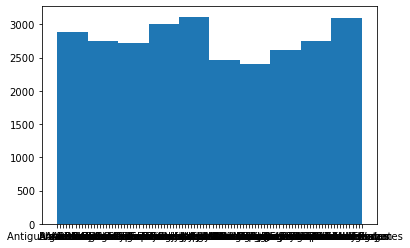

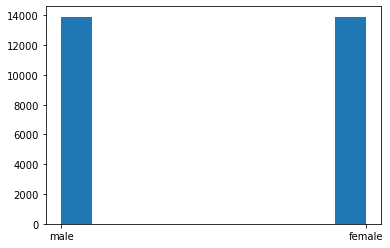

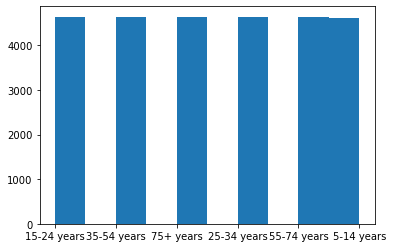

In [47]:
for col in discrete_vars:
    plt.hist(df[col])
    plt.show()

In [49]:
df["dummy"]=1

In [55]:
# modes printed in form: mode_value, count
for col in discrete_vars:
    mode = df.groupby(by=col, as_index=False).sum()[[col, "dummy"]].max()
    print(mode[col], ",", mode["dummy"])
    print()

Uzbekistan , 382

male , 13910

75+ years , 4642



In [1]:
!pip install scipy

You should consider upgrading via the 'C:\Users\drbha\Envs\venv01\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
!workon venv01

In [4]:
import scipy

ModuleNotFoundError: No module named 'scipy'